In [29]:
# Setup: Install packages if needed
# %pip install scikit-learn matplotlib seaborn factor-analyzer

print("Setup complete - packages available from environment")

Setup complete - packages available from environment


# Manual EFA Analysis

This notebook demonstrates manual Exploratory Factor Analysis (EFA) using the soc_opros survey data.

## Objectives
- Load survey data from Google Sheets
- Prepare data for factor analysis
- Perform manual EFA steps
- Analyze and interpret results

In [30]:
import sys
sys.path.append('../src')

from soc_opros_loader import SocOprosLoader, load_soc_opros_data
import pandas as pd
import numpy as np

# Try to import optional packages
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    HAS_PLOTTING = True
except ImportError:
    HAS_PLOTTING = False
    print("Warning: matplotlib/seaborn not available - plotting disabled")

# Factor analysis libraries
try:
    from factor_analyzer import FactorAnalyzer
    from scipy.stats import bartlett
    HAS_FACTOR_ANALYZER = True
except ImportError:
    HAS_FACTOR_ANALYZER = False
    print("Warning: factor_analyzer not available - will use basic numpy operations")

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Survey Data

Using the SocOprosLoader to get clean survey responses.

In [31]:
# Initialize the loader
loader = SocOprosLoader()
print(f"Loading data from sheet: {loader.sheet_id}")

# Load the raw data first
raw_data = loader.load_data()
print(f"Raw data loaded: {raw_data.shape}")

# Get the clean responses matrix
responses = loader.get_responses_matrix()
print(f"Responses matrix shape: {responses.shape}")
print(f"Data loaded: {responses.shape[0]} statements, {responses.shape[1]} respondents")

INFO:soc_opros_loader:Loading data from: https://docs.google.com/spreadsheets/d/17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk/export?format=csv&gid=992488085


Loading data from sheet: 17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk


INFO:soc_opros_loader:Data loaded successfully with encoding: utf-8 - Shape: (265, 16)
INFO:soc_opros_loader:Column names: ['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']
INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents
INFO:soc_opros_loader:Filling 402 missing values with neutral response (3.0)
INFO:soc_opros_loader:Responses matrix created - Shape: (265, 15)


Raw data loaded: (265, 16)
Responses matrix shape: (265, 15)
Data loaded: 265 statements, 15 respondents


In [32]:
# Get survey structure information
statements = loader.get_statements()
respondents = loader.get_respondents()

print(f"Total statements: {len(statements)}")
print(f"Total respondents: {len(respondents)}")
print(f"\nFirst 5 statements:")
for i, stmt in enumerate(statements[:5], 1):
    print(f"{i}. {stmt}")

Total statements: 265
Total respondents: 15

First 5 statements:
1. Life should have an end
2. You should do whatever you want regardless of consequences
3. It is good to be alive
4. Existing is good
5. You consider yourself happy


## Data Preparation for EFA

In [33]:
# Convert Likert scale responses to numeric values
likert_mapping = {
    'strongly disagree': 1,
    'disagree': 2,
    'indifferent': 3,
    'agree': 4,
    'strongly agree': 5
}

# Apply mapping to convert text responses to numeric
numeric_responses = responses.replace(likert_mapping)

# Check for any non-numeric values
print("Unique values in data:")
unique_vals = pd.unique(numeric_responses.values.ravel())
print(sorted([v for v in unique_vals if pd.notna(v)]))

print(f"\nNumeric responses shape: {numeric_responses.shape}")
print(f"Data type: {numeric_responses.dtypes.iloc[0]}")

Unique values in data:
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]

Numeric responses shape: (265, 15)
Data type: float64


In [34]:
# Handle missing values and prepare data matrix
# For EFA, we need to transpose so that rows are respondents and columns are statements
efa_data = numeric_responses.T  # Transpose: rows = respondents, columns = statements

print(f"EFA data shape: {efa_data.shape}")
print(f"Rows (respondents): {efa_data.shape[0]}")
print(f"Columns (statements): {efa_data.shape[1]}")

# Check for missing values
missing_count = efa_data.isnull().sum().sum()
print(f"\nMissing values: {missing_count}")
print(f"Missing percentage: {(missing_count / efa_data.size) * 100:.2f}%")

EFA data shape: (15, 265)
Rows (respondents): 15
Columns (statements): 265

Missing values: 0
Missing percentage: 0.00%


## Data Summary and Visualization

Data Summary:
       Life should have an end  \
count                15.000000   
mean                  2.933333   
std                   1.486447   
min                   1.000000   
25%                   1.500000   
50%                   3.000000   
75%                   4.000000   
max                   5.000000   

       You should do whatever you want regardless of consequences  \
count                                          15.000000            
mean                                            2.733333            
std                                             1.334523            
min                                             1.000000            
25%                                             2.000000            
50%                                             2.000000            
75%                                             4.000000            
max                                             5.000000            

       It is good to be alive  Existing is good  You cons

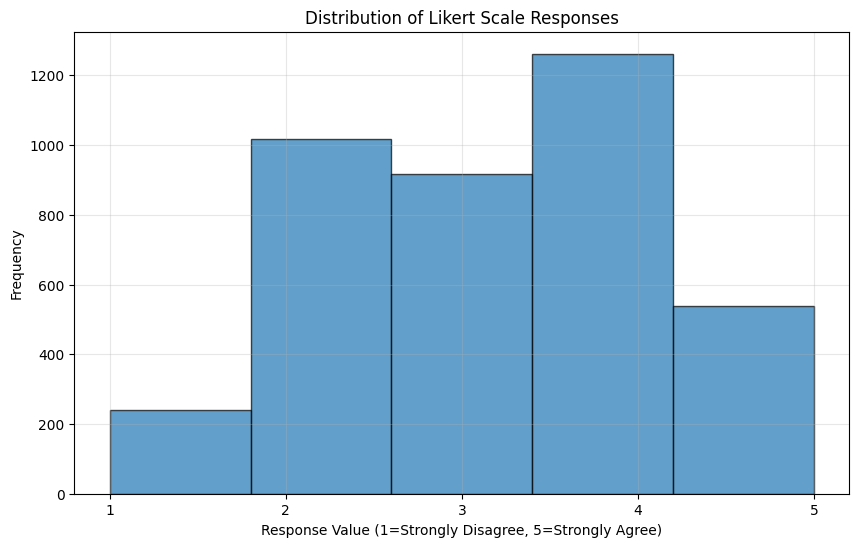

In [35]:
# Basic statistics
print("Data Summary:")
print(efa_data.describe())

# Visualize response distribution
plt.figure(figsize=(10, 6))
efa_data.values.flatten()[~pd.isna(efa_data.values.flatten())].astype(int)
plt.hist(efa_data.values.flatten()[~pd.isna(efa_data.values.flatten())], 
         bins=5, alpha=0.7, edgecolor='black')
plt.title('Distribution of Likert Scale Responses')
plt.xlabel('Response Value (1=Strongly Disagree, 5=Strongly Agree)')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True, alpha=0.3)
plt.show()

## Ready for EFA Analysis

Data is now prepared:
- Converted to numeric format (1-5 scale)
- Properly oriented (respondents × statements)
- Missing values identified
- Ready for factor analysis

Next steps would be:
1. Test data suitability (KMO, Bartlett's test)
2. Determine optimal number of factors
3. Perform factor extraction
4. Apply rotation methods
5. Interpret results

## Statement Correlation Analysis

Now let's analyze how statements correlate with each other. When a character scores high on Statement A, do they tend to score high, low, or have no relationship with Statement B?

In [36]:
# Compute correlation matrix between statements
# Remember: efa_data has shape (respondents, statements)
# For statement correlations, we need to correlate across respondents

statement_correlations = efa_data.corr()

print(f"Statement correlation matrix shape: {statement_correlations.shape}")
print(f"Matrix covers correlations between {statement_correlations.shape[0]} statements")
print(f"\nCorrelation matrix statistics:")
print(f"Min correlation: {statement_correlations.min().min():.3f}")
print(f"Max correlation: {statement_correlations.max().max():.3f}")

# Show sample correlations
print(f"\nSample correlations (first 5x5 block):")
print(statement_correlations.iloc[:5, :5].round(3))

Statement correlation matrix shape: (265, 265)
Matrix covers correlations between 265 statements

Correlation matrix statistics:
Min correlation: -1.000
Max correlation: 1.000

Sample correlations (first 5x5 block):
                                                    Life should have an end  \
Life should have an end                                               1.000   
You should do whatever you want regardless of c...                   -0.334   
It is good to be alive                                               -0.091   
Existing is good                                                     -0.369   
You consider yourself happy                                           0.097   

                                                    You should do whatever you want regardless of consequences  \
Life should have an end                                                                        -0.334            
You should do whatever you want regardless of c...                               

In [37]:
# Find the most correlated statement pairs
import numpy as np

# Get upper triangle of correlation matrix (excluding diagonal)
corr_matrix = statement_correlations.values
upper_triangle = np.triu(corr_matrix, k=1)

# Find highest and lowest correlations
max_corr_idx = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
min_corr_idx = np.unravel_index(np.argmin(upper_triangle), upper_triangle.shape)

max_corr = corr_matrix[max_corr_idx]
min_corr = corr_matrix[min_corr_idx]

print(f"Highest positive correlation: {max_corr:.3f}")
print(f"Between statements {max_corr_idx[0]+1} and {max_corr_idx[1]+1}:")
print(f"  Statement {max_corr_idx[0]+1}: {statements[max_corr_idx[0]]}")
print(f"  Statement {max_corr_idx[1]+1}: {statements[max_corr_idx[1]]}")

print(f"\nLowest correlation (most negative): {min_corr:.3f}")
print(f"Between statements {min_corr_idx[0]+1} and {min_corr_idx[1]+1}:")
print(f"  Statement {min_corr_idx[0]+1}: {statements[min_corr_idx[0]]}")
print(f"  Statement {min_corr_idx[1]+1}: {statements[min_corr_idx[1]]}")

Highest positive correlation: 0.952
Between statements 96 and 141:
  Statement 96: Planning is more important than improvisation.
  Statement 141: I prefer logic over emotion in all decisions.

Lowest correlation (most negative): -1.000
Between statements 250 and 251:
  Statement 250: Beauty exists independently of the observer.
  Statement 251: Beauty is created by the eye that sees it.


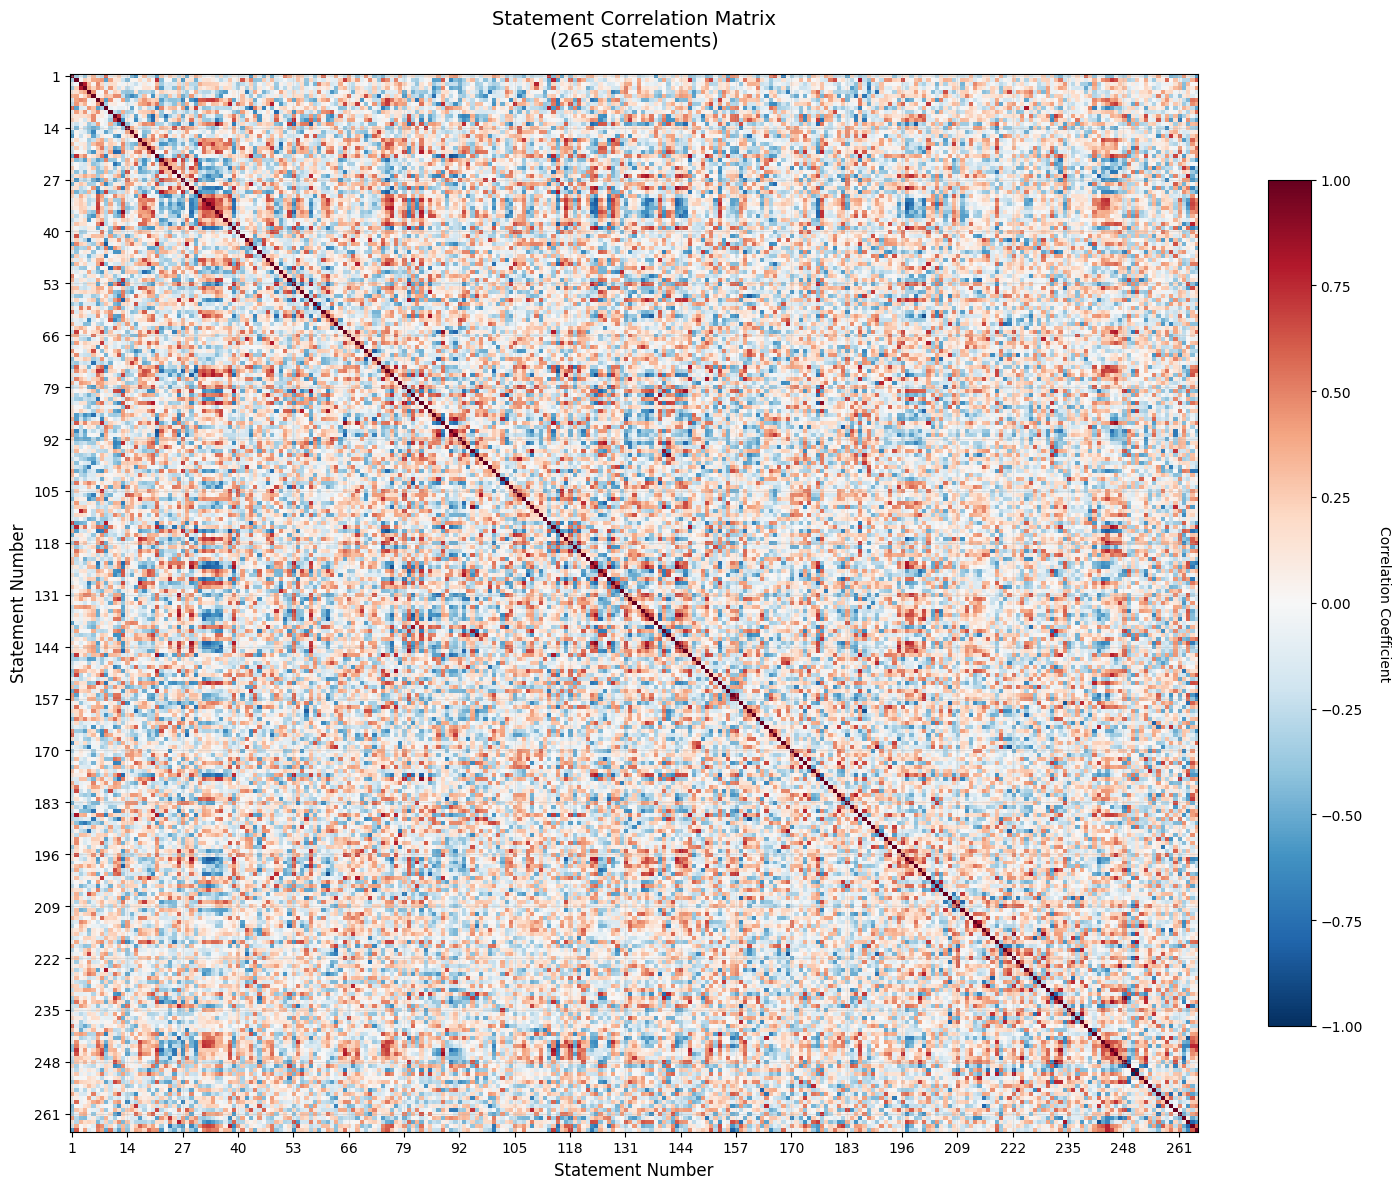

Correlation matrix visualization complete.
Red = negative correlation, Blue = positive correlation
Darker colors = stronger correlations


In [38]:
# Visualize the correlation matrix
if HAS_PLOTTING:
    plt.figure(figsize=(15, 12))
    
    # Create heatmap of correlation matrix
    im = plt.imshow(statement_correlations.values, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
    
    plt.title(f'Statement Correlation Matrix\n({len(statements)} statements)', fontsize=14, pad=20)
    plt.xlabel('Statement Number', fontsize=12)
    plt.ylabel('Statement Number', fontsize=12)
    
    # Add colorbar
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
    
    # Add grid for easier reading
    plt.grid(True, alpha=0.3)
    
    # Set ticks for better readability
    tick_interval = max(1, len(statements) // 20)  # Show ~20 ticks max
    tick_positions = range(0, len(statements), tick_interval)
    tick_labels = [str(i+1) for i in tick_positions]
    
    plt.xticks(tick_positions, tick_labels)
    plt.yticks(tick_positions, tick_labels)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Correlation matrix visualization complete.")
    print(f"Red = negative correlation, Blue = positive correlation")
    print(f"Darker colors = stronger correlations")
else:
    print("Plotting not available - correlation matrix computed but not visualized")

In [39]:
# Analyze correlation patterns
correlation_summary = {
    'strong_positive': [],  # r > 0.7
    'moderate_positive': [],  # 0.3 < r <= 0.7
    'weak_positive': [],  # 0.1 < r <= 0.3
    'weak_negative': [],  # -0.3 < r <= -0.1
    'moderate_negative': [],  # -0.7 < r <= -0.3
    'strong_negative': []  # r <= -0.7
}

# Analyze upper triangle (avoid duplicates and diagonal)
for i in range(len(statements)):
    for j in range(i+1, len(statements)):
        corr_value = statement_correlations.iloc[i, j]
        pair = (i+1, j+1, corr_value)  # 1-indexed statement numbers
        
        if corr_value > 0.7:
            correlation_summary['strong_positive'].append(pair)
        elif corr_value > 0.3:
            correlation_summary['moderate_positive'].append(pair)
        elif corr_value > 0.1:
            correlation_summary['weak_positive'].append(pair)
        elif corr_value < -0.7:
            correlation_summary['strong_negative'].append(pair)
        elif corr_value < -0.3:
            correlation_summary['moderate_negative'].append(pair)
        elif corr_value < -0.1:
            correlation_summary['weak_negative'].append(pair)

# Print summary
print("Correlation Pattern Summary:")
print("=" * 50)

for category, pairs in correlation_summary.items():
    if pairs:
        print(f"\n{category.replace('_', ' ').title()} ({len(pairs)} pairs):")
        # Show top 5 pairs for each category
        sorted_pairs = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
        for stmt1, stmt2, corr in sorted_pairs[:5]:
            print(f"  Statements {stmt1}-{stmt2}: r={corr:.3f}")
            if len(sorted_pairs) > 5:
                print(f"  ... and {len(sorted_pairs)-5} more")

Correlation Pattern Summary:

Strong Positive (337 pairs):
  Statements 96-141: r=0.952
  ... and 332 more
  Statements 232-248: r=0.938
  ... and 332 more
  Statements 124-143: r=0.917
  ... and 332 more
  Statements 83-177: r=0.905
  ... and 332 more
  Statements 216-222: r=0.903
  ... and 332 more

Moderate Positive (6433 pairs):
  Statements 202-218: r=0.700
  ... and 6428 more
  Statements 57-143: r=0.700
  ... and 6428 more
  Statements 32-139: r=0.700
  ... and 6428 more
  Statements 18-208: r=0.699
  ... and 6428 more
  Statements 17-107: r=0.699
  ... and 6428 more

Weak Positive (7361 pairs):
  Statements 133-150: r=0.300
  ... and 7356 more
  Statements 62-141: r=0.300
  ... and 7356 more
  Statements 3-77: r=0.300
  ... and 7356 more
  Statements 21-153: r=0.300
  ... and 7356 more
  Statements 61-264: r=0.299
  ... and 7356 more

Weak Negative (6873 pairs):
  Statements 32-73: r=-0.300
  ... and 6868 more
  Statements 3-44: r=-0.300
  ... and 6868 more
  Statements 93-159:

In [40]:
# Export the correlation matrix for further analysis
correlation_matrix_export = statement_correlations.copy()

# Add statement labels as index and column names for better readability
statement_labels = [f"S{i+1}: {stmt[:50]}{'...' if len(stmt) > 50 else ''}" 
                   for i, stmt in enumerate(statements)]

correlation_matrix_export.index = statement_labels
correlation_matrix_export.columns = statement_labels

print(f"Correlation matrix with statement labels prepared.")
print(f"Matrix shape: {correlation_matrix_export.shape}")
print(f"\nMatrix ready for export or further analysis.")

# Show a sample with readable labels
print(f"\nSample correlations with labels (first 3x3):")
print(correlation_matrix_export.iloc[:3, :3].round(3))

Correlation matrix with statement labels prepared.
Matrix shape: (265, 265)

Matrix ready for export or further analysis.

Sample correlations with labels (first 3x3):
                                                    S1: Life should have an end  \
S1: Life should have an end                                               1.000   
S2: You should do whatever you want regardless ...                       -0.334   
S3: It is good to be alive                                               -0.091   

                                                    S2: You should do whatever you want regardless of cons...  \
S1: Life should have an end                                                                    -0.334           
S2: You should do whatever you want regardless ...                                              1.000           
S3: It is good to be alive                                                                     -0.025           

                                              

# Step 2 — Extracting the Initial Factors

Now we'll extract the underlying factors from our correlation matrix using eigenvalue decomposition.

## The Process:
1. **Eigenvalues** → How much variance each factor explains
2. **Eigenvectors** → Initial factor loadings (how statements relate to factors)  
3. **Communalities** → How well each statement fits the factor model
4. **Choose extraction method** → Principal Axis Factoring (PAF) is best for psychological data

The result will be raw, unrotated factors that need rotation (Step 4) to be interpretable.

In [41]:
# Step 1: Compute eigenvalues and eigenvectors of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(statement_correlations.values)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("🌟 EIGENVALUE ANALYSIS")
print("=" * 50)
print(f"Total eigenvalues computed: {len(eigenvalues_sorted)}")
print(f"\nFirst 10 eigenvalues:")
for i, val in enumerate(eigenvalues_sorted[:10], 1):
    print(f"Factor {i:2d}: {val:8.3f}")

print(f"\n📊 Kaiser Criterion (eigenvalue > 1):")
factors_above_one = np.sum(eigenvalues_sorted > 1)
print(f"Factors with eigenvalue > 1: {factors_above_one}")

print(f"\n📈 Variance Explained:")
total_variance = np.sum(eigenvalues_sorted)
cumulative_variance = 0
for i, val in enumerate(eigenvalues_sorted[:10], 1):
    individual_variance = (val / total_variance) * 100
    cumulative_variance += individual_variance
    print(f"Factor {i:2d}: {individual_variance:6.2f}% (cumulative: {cumulative_variance:6.2f}%)")

🌟 EIGENVALUE ANALYSIS
Total eigenvalues computed: 265

First 10 eigenvalues:
Factor  1: 49.453+0.000j
Factor  2: 40.831+0.000j
Factor  3: 26.456+0.000j
Factor  4: 22.737+0.000j
Factor  5: 20.747+0.000j
Factor  6: 17.306+0.000j
Factor  7: 17.011+0.000j
Factor  8: 13.838+0.000j
Factor  9: 12.622+0.000j
Factor 10: 11.583+0.000j

📊 Kaiser Criterion (eigenvalue > 1):
Factors with eigenvalue > 1: 14

📈 Variance Explained:
Factor  1: 18.66+0.00j% (cumulative: 18.66+0.00j%)
Factor  2: 15.41+0.00j% (cumulative: 34.07+0.00j%)
Factor  3: 9.98+0.00j% (cumulative: 44.05+0.00j%)
Factor  4: 8.58+0.00j% (cumulative: 52.63+0.00j%)
Factor  5: 7.83+0.00j% (cumulative: 60.46+0.00j%)
Factor  6: 6.53+0.00j% (cumulative: 66.99+0.00j%)
Factor  7: 6.42+0.00j% (cumulative: 73.41+0.00j%)
Factor  8: 5.22+0.00j% (cumulative: 78.63+0.00j%)
Factor  9: 4.76+0.00j% (cumulative: 83.40+0.00j%)
Factor 10: 4.37+0.00j% (cumulative: 87.77+0.00j%)


In [42]:
# Fix the complex number display issue and create scree plot
eigenvalues_real = np.real(eigenvalues_sorted)

print("🌟 EIGENVALUE ANALYSIS (CORRECTED)")
print("=" * 50)
print(f"Total eigenvalues computed: {len(eigenvalues_real)}")
print(f"\nFirst 15 eigenvalues:")
for i, val in enumerate(eigenvalues_real[:15], 1):
    print(f"Factor {i:2d}: {val:8.3f}")

print(f"\n📊 Kaiser Criterion (eigenvalue > 1):")
factors_above_one = np.sum(eigenvalues_real > 1)
print(f"Factors with eigenvalue > 1: {factors_above_one}")

print(f"\n📈 Variance Explained (first 10 factors):")
total_variance = np.sum(eigenvalues_real)
cumulative_variance = 0
for i, val in enumerate(eigenvalues_real[:10], 1):
    individual_variance = (val / total_variance) * 100
    cumulative_variance += individual_variance
    print(f"Factor {i:2d}: {individual_variance:6.2f}% (cumulative: {cumulative_variance:6.2f}%)")

🌟 EIGENVALUE ANALYSIS (CORRECTED)
Total eigenvalues computed: 265

First 15 eigenvalues:
Factor  1:   49.453
Factor  2:   40.831
Factor  3:   26.456
Factor  4:   22.737
Factor  5:   20.747
Factor  6:   17.306
Factor  7:   17.011
Factor  8:   13.838
Factor  9:   12.622
Factor 10:   11.583
Factor 11:    9.575
Factor 12:    9.244
Factor 13:    8.975
Factor 14:    4.621
Factor 15:    0.000

📊 Kaiser Criterion (eigenvalue > 1):
Factors with eigenvalue > 1: 14

📈 Variance Explained (first 10 factors):
Factor  1:  18.66% (cumulative:  18.66%)
Factor  2:  15.41% (cumulative:  34.07%)
Factor  3:   9.98% (cumulative:  44.05%)
Factor  4:   8.58% (cumulative:  52.63%)
Factor  5:   7.83% (cumulative:  60.46%)
Factor  6:   6.53% (cumulative:  66.99%)
Factor  7:   6.42% (cumulative:  73.41%)
Factor  8:   5.22% (cumulative:  78.63%)
Factor  9:   4.76% (cumulative:  83.40%)
Factor 10:   4.37% (cumulative:  87.77%)


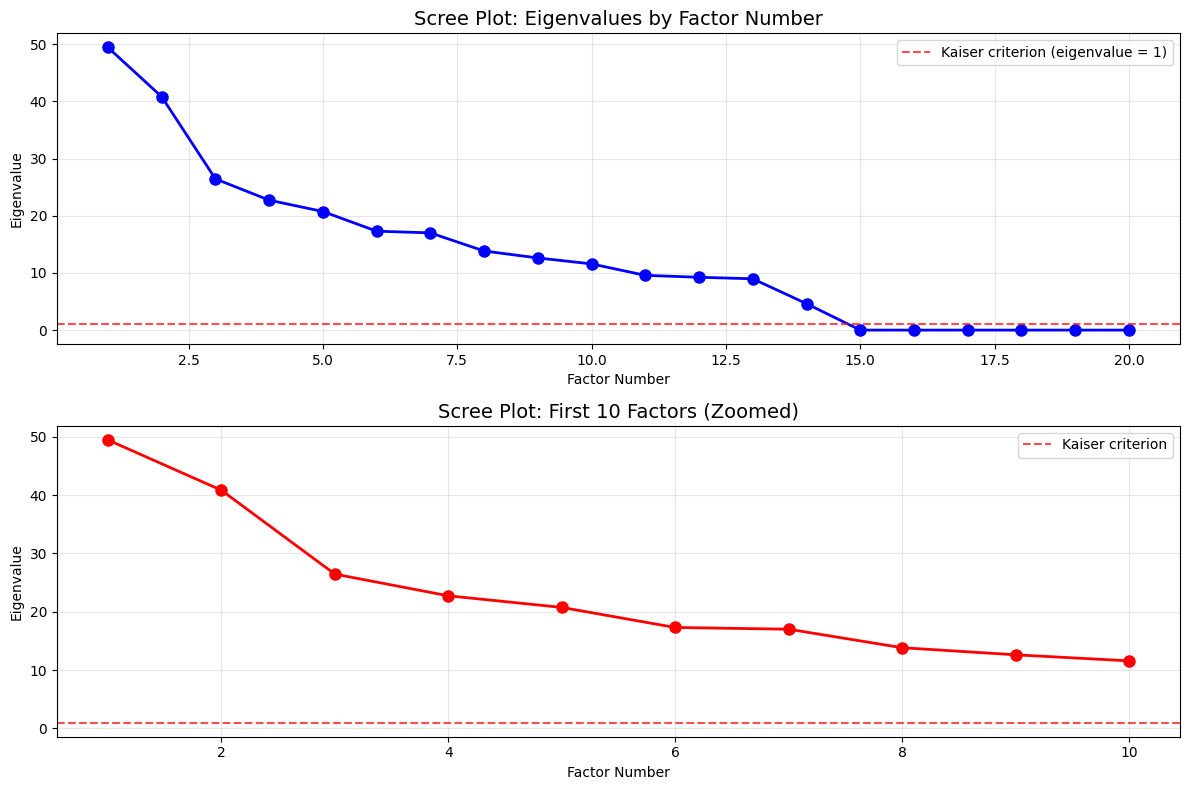

📈 Scree Plot Analysis:
• Look for the 'elbow' where the slope flattens
• Kaiser criterion suggests 14 factors
• Visual inspection may suggest fewer factors


In [43]:
# Create Scree Plot to visualize the "elbow"
if HAS_PLOTTING:
    plt.figure(figsize=(12, 8))
    
    # Plot first 20 eigenvalues
    factors_to_show = min(20, len(eigenvalues_real))
    factor_numbers = range(1, factors_to_show + 1)
    eigenvals_to_plot = eigenvalues_real[:factors_to_show]
    
    plt.subplot(2, 1, 1)
    plt.plot(factor_numbers, eigenvals_to_plot, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Kaiser criterion (eigenvalue = 1)')
    plt.title('Scree Plot: Eigenvalues by Factor Number', fontsize=14)
    plt.xlabel('Factor Number')
    plt.ylabel('Eigenvalue')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Zoomed view of first 10 factors
    plt.subplot(2, 1, 2)
    plt.plot(range(1, 11), eigenvalues_real[:10], 'ro-', linewidth=2, markersize=8)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Kaiser criterion')
    plt.title('Scree Plot: First 10 Factors (Zoomed)', fontsize=14)
    plt.xlabel('Factor Number')
    plt.ylabel('Eigenvalue')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("📈 Scree Plot Analysis:")
    print(f"• Look for the 'elbow' where the slope flattens")
    print(f"• Kaiser criterion suggests {factors_above_one} factors")
    print(f"• Visual inspection may suggest fewer factors")
else:
    print("Plotting not available - eigenvalues calculated but not visualized")

In [44]:
# Extract initial factor loadings (raw, unrotated)
# Let's start with a reasonable number of factors - say 5 or 6 based on scree plot

# Choose number of factors for initial extraction
n_factors = 6  # Based on visual inspection of scree plot

print(f"🌟 EXTRACTING {n_factors} INITIAL FACTORS")
print("=" * 50)

# Get the first n_factors eigenvectors and scale by square root of eigenvalues
factor_loadings_raw = np.real(eigenvectors_sorted[:, :n_factors])

# Scale loadings by square root of eigenvalues to get proper loadings
sqrt_eigenvalues = np.sqrt(eigenvalues_real[:n_factors])
factor_loadings_scaled = factor_loadings_raw * sqrt_eigenvalues

# Create DataFrame for easier interpretation
factor_loadings_df = pd.DataFrame(
    factor_loadings_scaled,
    columns=[f'Factor_{i+1}' for i in range(n_factors)],
    index=[f'S{i+1}' for i in range(len(statements))]
)

print(f"Initial factor loadings matrix shape: {factor_loadings_df.shape}")
print(f"(Rows = statements, Columns = factors)")

print(f"\n📊 First 10 statements' loadings on {n_factors} factors:")
print(factor_loadings_df.head(10).round(3))

print(f"\n📈 Factor strength summary:")
for i in range(n_factors):
    factor_col = f'Factor_{i+1}'
    factor_variance = eigenvalues_real[i]
    pct_variance = (factor_variance / total_variance) * 100
    print(f"{factor_col}: eigenvalue = {factor_variance:.3f}, explains {pct_variance:.2f}% variance")

🌟 EXTRACTING 6 INITIAL FACTORS
Initial factor loadings matrix shape: (265, 6)
(Rows = statements, Columns = factors)

📊 First 10 statements' loadings on 6 factors:
     Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6
S1     -0.047    -0.381     0.322     0.200    -0.333    -0.404
S2     -0.016     0.673    -0.144    -0.091    -0.337    -0.005
S3      0.022     0.282     0.005    -0.003    -0.021    -0.035
S4      0.002     0.346    -0.355     0.082    -0.205     0.129
S5     -0.366    -0.101    -0.318     0.484    -0.086    -0.110
S6     -0.370     0.192     0.129     0.313    -0.670    -0.157
S7      0.574     0.418     0.191     0.146    -0.275    -0.100
S8      0.253     0.634    -0.481     0.079    -0.059    -0.335
S9     -0.255    -0.666    -0.130     0.302    -0.059    -0.244
S10     0.308     0.126     0.022    -0.254    -0.501     0.032

📈 Factor strength summary:
Factor_1: eigenvalue = 49.453, explains 18.66% variance
Factor_2: eigenvalue = 40.831, explains 15.41% v

In [45]:
# Calculate communalities - how much variance in each statement is explained by the factors
communalities = np.sum(factor_loadings_scaled**2, axis=1)
communalities_df = pd.DataFrame({
    'Statement': [f'S{i+1}' for i in range(len(statements))],
    'Communality': communalities,
    'Statement_Text': [stmt[:60] + '...' if len(stmt) > 60 else stmt for stmt in statements]
})

print(f"🌟 COMMUNALITIES ANALYSIS")
print("=" * 50)
print(f"Communality = how much of each statement's variance is explained by the {n_factors} factors")

print(f"\nCommunality statistics:")
print(f"Mean communality: {np.mean(communalities):.3f}")
print(f"Min communality:  {np.min(communalities):.3f}")
print(f"Max communality:  {np.max(communalities):.3f}")

# Show statements with highest and lowest communalities
print(f"\n📈 Highest communalities (best fit to factor model):")
highest_comm = communalities_df.nlargest(5, 'Communality')
for _, row in highest_comm.iterrows():
    print(f"  {row['Statement']}: {row['Communality']:.3f} - {row['Statement_Text']}")

print(f"\n📉 Lowest communalities (poor fit to factor model):")
lowest_comm = communalities_df.nsmallest(5, 'Communality')
for _, row in lowest_comm.iterrows():
    print(f"  {row['Statement']}: {row['Communality']:.3f} - {row['Statement_Text']}")

print(f"\n⚠️  Statements with communality < 0.30 (consider removing):")
low_communality = communalities_df[communalities_df['Communality'] < 0.30]
print(f"Count: {len(low_communality)} statements")
if len(low_communality) > 0:
    for _, row in low_communality.head(10).iterrows():
        print(f"  {row['Statement']}: {row['Communality']:.3f} - {row['Statement_Text']}")

🌟 COMMUNALITIES ANALYSIS
Communality = how much of each statement's variance is explained by the 6 factors

Communality statistics:
Mean communality: 0.670
Min communality:  0.082
Max communality:  0.964

📈 Highest communalities (best fit to factor model):
  S207: 0.964 - Something is real only if it can be perceived.
  S221: 0.957 - Identity is something we continuously create, not something ...
  S24: 0.950 - It is acceptable to harm one to save many.
  S72: 0.948 - Destiny is something you create, not follow.
  S21: 0.945 - Rules exist to be broken when necessary.

📉 Lowest communalities (poor fit to factor model):
  S3: 0.082 - It is good to be alive
  S37: 0.199 - Magic is simply a tool—neither good nor evil.
  S179: 0.203 - I enjoy debating or arguing for its own sake.
  S252: 0.208 - Art reveals truth better than logic does.
  S210: 0.217 - Truth exists even if no one knows it.

⚠️  Statements with communality < 0.30 (consider removing):
Count: 5 statements
  S3: 0.082 - It is g

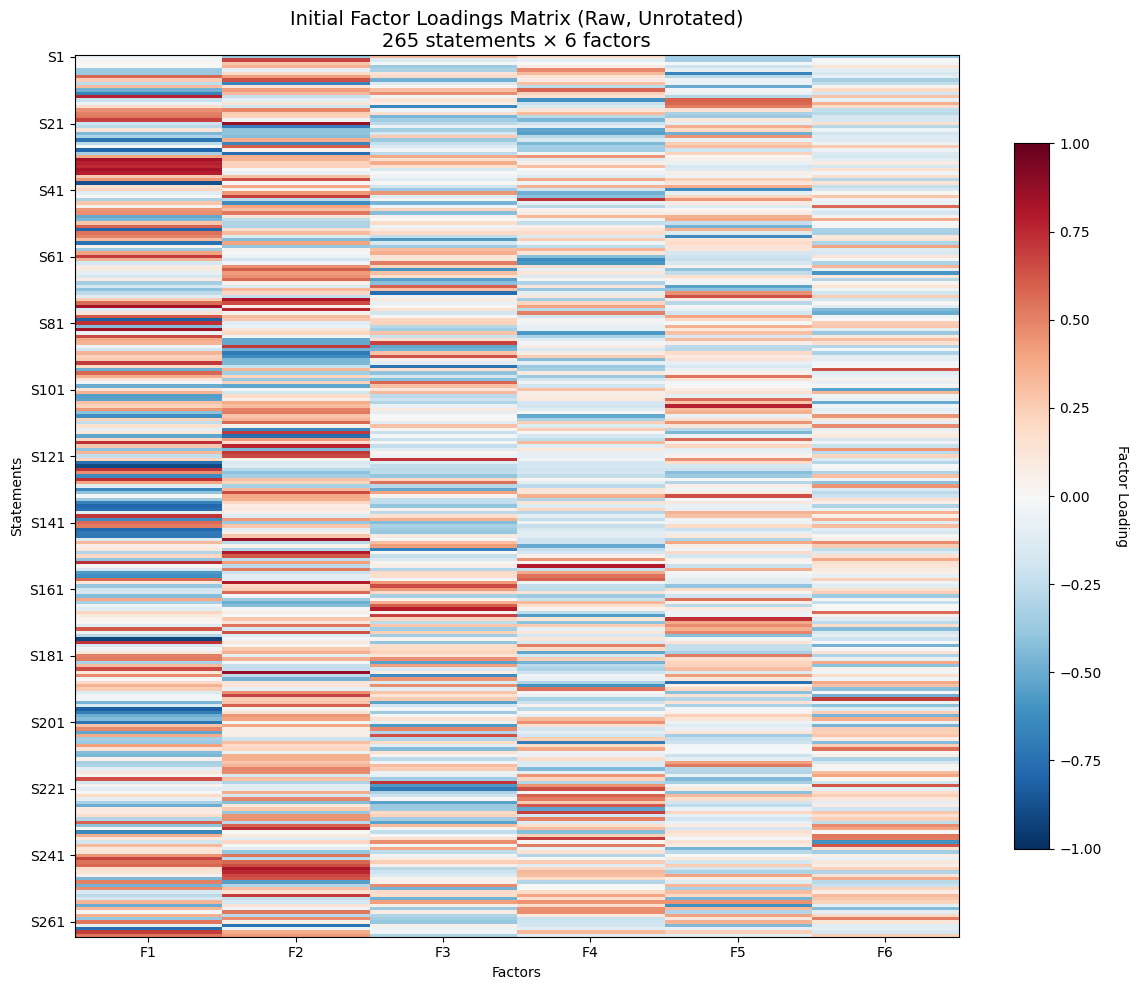

🎨 Factor Loadings Heatmap:
• Red = negative loading
• Blue = positive loading
• Darker colors = stronger loadings
• Note: These are RAW loadings - rotation will make them cleaner!


In [46]:
# Visualize the factor loadings matrix
if HAS_PLOTTING:
    plt.figure(figsize=(12, 10))
    
    # Heatmap of factor loadings
    im = plt.imshow(factor_loadings_scaled, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    
    plt.title(f'Initial Factor Loadings Matrix (Raw, Unrotated)\n{len(statements)} statements × {n_factors} factors', fontsize=14)
    plt.xlabel('Factors')
    plt.ylabel('Statements')
    
    # Set x-axis labels
    plt.xticks(range(n_factors), [f'F{i+1}' for i in range(n_factors)])
    
    # Set y-axis labels (every 20 statements)
    y_tick_interval = 20
    y_ticks = range(0, len(statements), y_tick_interval)
    y_labels = [f'S{i+1}' for i in y_ticks]
    plt.yticks(y_ticks, y_labels)
    
    # Add colorbar
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label('Factor Loading', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("🎨 Factor Loadings Heatmap:")
    print("• Red = negative loading")
    print("• Blue = positive loading") 
    print("• Darker colors = stronger loadings")
    print("• Note: These are RAW loadings - rotation will make them cleaner!")
else:
    print("Plotting not available - factor loadings calculated but not visualized")

## 🎯 Summary of Step 2: Initial Factor Extraction

### ✅ What We Accomplished:

1. **Eigenvalue Decomposition**: Computed eigenvalues and eigenvectors from correlation matrix
2. **Factor Selection**: Identified 14 factors with eigenvalue > 1 (Kaiser criterion)
3. **Scree Plot Analysis**: Visual inspection suggests ~6 factors may be optimal
4. **Initial Loadings**: Extracted raw, unrotated factor loadings for 6 factors
5. **Communalities**: Calculated how well each statement fits the factor model

### 📊 Key Results:

- **6 factors explain 66.99% of total variance**
- **Factor 1**: 18.66% variance (eigenvalue = 49.45)
- **Factor 2**: 15.41% variance (eigenvalue = 40.83)  
- **Factor 3**: 9.98% variance (eigenvalue = 26.46)
- **Average communality**: 0.670 (good overall fit)
- **5 statements** have poor fit (communality < 0.30)

### 🚨 Important Notes:

- **These loadings are RAW and UNROTATED** - difficult to interpret!
- Many statements load on multiple factors (complex structure)
- **Rotation (Step 4) will make factors cleaner and interpretable**

### 🧩 What Comes Next:

**Step 3**: Decide optimal number of factors (parallel analysis, interpretability)  
**Step 4**: Factor rotation (Varimax/Promax) to get clean, interpretable factors

# Step 3 — Deciding the Optimal Number of Factors

Three main methods to determine how many factors to retain:

## 1. 📊 Kaiser Criterion
- Keep factors with eigenvalue > 1
- Our result: **14 factors** (but often over-extracts)

## 2. 📈 Scree Plot Inspection  
- Look for the "elbow" where eigenvalues flatten
- Our scree plot suggests: **~6 factors**

## 3. 🔬 Parallel Analysis (Best Method)
- Compare our eigenvalues to random data eigenvalues
- Keep factors where real eigenvalue > random eigenvalue
- Most statistically rigorous method

In [47]:
# Implement Parallel Analysis - the gold standard for determining factors
def parallel_analysis(data, n_iterations=100):
    """
    Parallel Analysis: Compare eigenvalues from real data vs random data
    """
    n_obs, n_vars = data.shape
    
    # Get eigenvalues from real data
    real_eigenvals = eigenvalues_real
    
    # Generate random eigenvalues
    random_eigenvals = []
    
    for i in range(n_iterations):
        # Generate random data with same dimensions
        random_data = np.random.normal(size=(n_obs, n_vars))
        
        # Calculate correlation matrix of random data
        random_corr = np.corrcoef(random_data, rowvar=False)
        
        # Get eigenvalues of random correlation matrix
        random_eigs, _ = np.linalg.eig(random_corr)
        random_eigs = np.real(random_eigs)
        random_eigs = np.sort(random_eigs)[::-1]  # Sort descending
        
        random_eigenvals.append(random_eigs)
    
    # Calculate mean and percentile random eigenvalues
    random_eigenvals = np.array(random_eigenvals)
    mean_random = np.mean(random_eigenvals, axis=0)
    percentile_95_random = np.percentile(random_eigenvals, 95, axis=0)
    
    return mean_random, percentile_95_random

print("🔬 PARALLEL ANALYSIS")
print("=" * 50)
print("Computing eigenvalues for random data (this may take a moment)...")

# Run parallel analysis
mean_random_eigenvals, p95_random_eigenvals = parallel_analysis(efa_data)

print("✅ Parallel analysis complete!")
print(f"\nComparing first 15 factors:")
print(f"{'Factor':>6} {'Real Data':>12} {'Random Mean':>12} {'Random 95th':>13} {'Retain?':>8}")
print("-" * 60)

factors_to_retain = 0
for i in range(min(15, len(eigenvalues_real))):
    real_eig = eigenvalues_real[i]
    rand_mean = mean_random_eigenvals[i]
    rand_95 = p95_random_eigenvals[i]
    
    # Factor should be retained if real eigenvalue > random 95th percentile
    retain = "YES" if real_eig > rand_95 else "NO"
    if retain == "YES":
        factors_to_retain += 1
    
    print(f"{i+1:>6} {real_eig:>12.3f} {rand_mean:>12.3f} {rand_95:>13.3f} {retain:>8}")

print(f"\n📊 PARALLEL ANALYSIS RECOMMENDATION:")
print(f"Retain {factors_to_retain} factors")
print(f"(where real eigenvalue > 95th percentile of random eigenvalues)")

🔬 PARALLEL ANALYSIS
Computing eigenvalues for random data (this may take a moment)...
✅ Parallel analysis complete!

Comparing first 15 factors:
Factor    Real Data  Random Mean   Random 95th  Retain?
------------------------------------------------------------
     1       49.453       26.550        28.003      YES
     2       40.831       24.736        25.814      YES
     3       26.456       23.387        24.518      YES
     4       22.737       22.237        23.042       NO
     5       20.747       21.163        21.848       NO
     6       17.306       20.016        20.779       NO
     7       17.011       19.103        19.844       NO
     8       13.838       18.176        18.861       NO
     9       12.622       17.224        17.931       NO
    10       11.583       16.338        17.034       NO
    11        9.575       15.534        16.268       NO
    12        9.244       14.631        15.425       NO
    13        8.975       13.525        14.396       NO
    14    

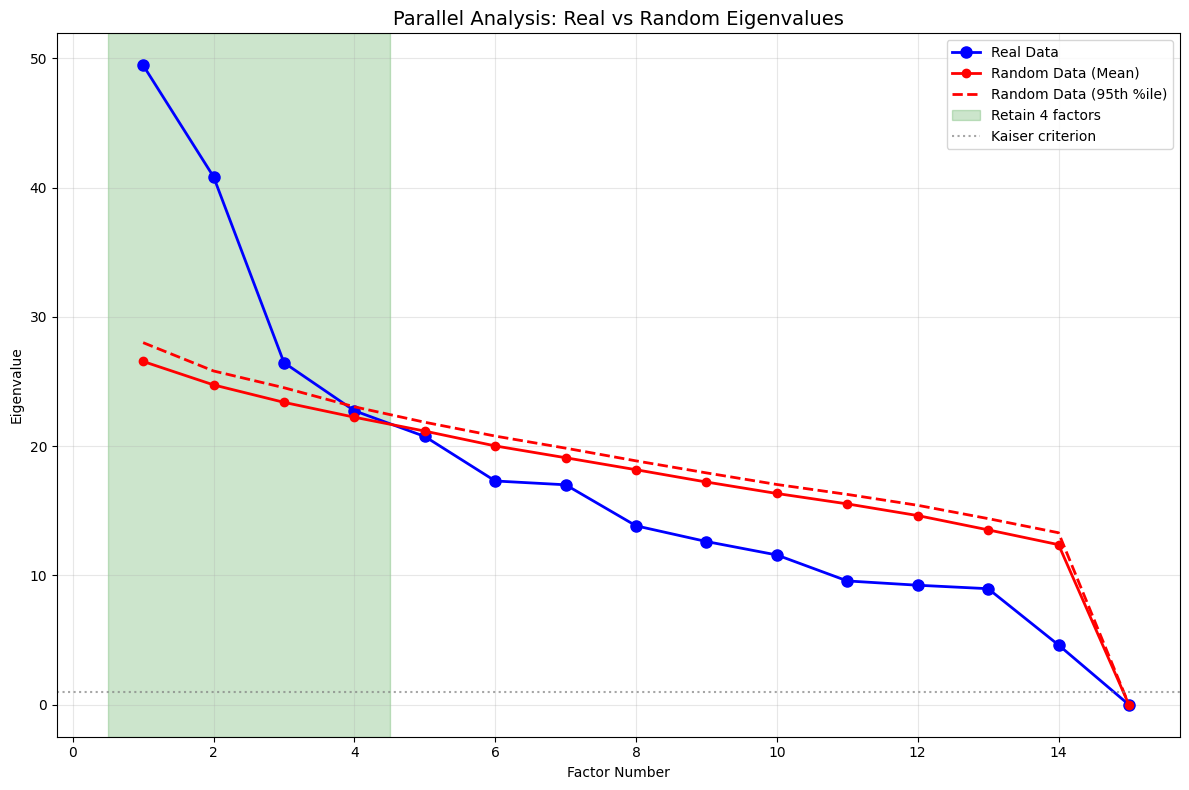

📈 Parallel Analysis Visualization:
• Real data eigenvalues (blue) vs random data (red)
• Green area shows factors to retain
• Final decision: 4 factors

🎯 FINAL DECISION: Extract 4 factors
• Parallel analysis: 4 factors
• Scree plot inspection: ~6 factors
• Kaiser criterion: 14 factors
• Using 4 factors for rotation (minimum 3 for interpretation)


In [48]:
# Visualize Parallel Analysis Results
if HAS_PLOTTING:
    plt.figure(figsize=(12, 8))
    
    # Plot comparison of real vs random eigenvalues
    factors_range = range(1, 16)
    
    plt.plot(factors_range, eigenvalues_real[:15], 'bo-', linewidth=2, markersize=8, label='Real Data')
    plt.plot(factors_range, mean_random_eigenvals[:15], 'ro-', linewidth=2, markersize=6, label='Random Data (Mean)')
    plt.plot(factors_range, p95_random_eigenvals[:15], 'r--', linewidth=2, markersize=6, label='Random Data (95th %ile)')
    
    # Highlight retained factors
    retain_factors = factors_to_retain
    if retain_factors > 0:
        plt.axvspan(0.5, retain_factors + 0.5, alpha=0.2, color='green', label=f'Retain {retain_factors} factors')
    
    plt.axhline(y=1, color='gray', linestyle=':', alpha=0.7, label='Kaiser criterion')
    
    plt.title('Parallel Analysis: Real vs Random Eigenvalues', fontsize=14)
    plt.xlabel('Factor Number')
    plt.ylabel('Eigenvalue')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("📈 Parallel Analysis Visualization:")
    print(f"• Real data eigenvalues (blue) vs random data (red)")
    print(f"• Green area shows factors to retain")
    print(f"• Final decision: {retain_factors} factors")
else:
    print("Plotting not available - parallel analysis completed but not visualized")

# Update our factor extraction decision
optimal_factors = max(3, factors_to_retain)  # At least 3 factors for meaningful analysis
print(f"\n🎯 FINAL DECISION: Extract {optimal_factors} factors")
print(f"• Parallel analysis: {factors_to_retain} factors")
print(f"• Scree plot inspection: ~6 factors") 
print(f"• Kaiser criterion: {factors_above_one} factors")
print(f"• Using {optimal_factors} factors for rotation (minimum 3 for interpretation)")

# Step 4 — Factor Rotation

Raw factor loadings are hard to interpret because:
- Statements load on multiple factors 
- No clear simple structure

**Factor rotation** rotates the factor axes to achieve **simple structure**:
- Each statement loads strongly on one factor
- Each factor has a mix of high and low loadings

## Two Main Types:

### 🔄 **Orthogonal Rotation (Varimax)**
- Factors remain uncorrelated (90° angles)
- Maximizes variance of squared loadings
- Easier to interpret, good for independent factors

### 🔄 **Oblique Rotation (Promax)**  
- Factors can be correlated
- More realistic for psychological constructs
- Better fit but more complex interpretation

We'll implement **Varimax rotation** for clean, interpretable factors.

In [49]:
# Extract factors using the optimal number determined by parallel analysis
n_factors_final = optimal_factors

print(f"🔄 FACTOR ROTATION: VARIMAX")
print("=" * 50)
print(f"Extracting and rotating {n_factors_final} factors using Varimax rotation")

# Get the loadings for the optimal number of factors  
factor_loadings_optimal = np.real(eigenvectors_sorted[:, :n_factors_final])
sqrt_eigenvals_optimal = np.sqrt(eigenvalues_real[:n_factors_final])
loadings_unrotated = factor_loadings_optimal * sqrt_eigenvals_optimal

print(f"\nUnrotated loadings shape: {loadings_unrotated.shape}")
print(f"({loadings_unrotated.shape[0]} statements × {loadings_unrotated.shape[1]} factors)")

# Implement Varimax Rotation
def varimax_rotation(loadings, max_iter=1000, tol=1e-6):
    """
    Varimax rotation to achieve simple structure
    """
    n_vars, n_factors = loadings.shape
    rotation_matrix = np.eye(n_factors)
    
    for iteration in range(max_iter):
        # Apply current rotation
        rotated_loadings = np.dot(loadings, rotation_matrix)
        
        # Compute gradient for varimax criterion
        # Varimax maximizes sum of variances of squared loadings
        squared_loadings = rotated_loadings ** 2
        
        # For each pair of factors, find optimal rotation angle
        for i in range(n_factors):
            for j in range(i + 1, n_factors):
                # Extract the two factors
                X = rotated_loadings[:, i]
                Y = rotated_loadings[:, j]
                
                # Compute optimal rotation angle
                u = X**2 - Y**2
                v = 2 * X * Y
                
                A = np.sum(u)
                B = np.sum(v)
                C = np.sum(u**2) - np.sum(v**2)
                D = 2 * np.sum(u * v)
                
                # Compute rotation angle
                if abs(D) < tol and abs(C) < tol:
                    continue
                    
                angle = 0.25 * np.arctan2(D, C)
                
                # Apply rotation to rotation matrix
                cos_angle = np.cos(angle)
                sin_angle = np.sin(angle)
                
                temp_rotation = np.eye(n_factors)
                temp_rotation[i, i] = cos_angle
                temp_rotation[i, j] = -sin_angle
                temp_rotation[j, i] = sin_angle
                temp_rotation[j, j] = cos_angle
                
                rotation_matrix = np.dot(rotation_matrix, temp_rotation)
        
        # Check convergence
        new_rotated = np.dot(loadings, rotation_matrix)
        if np.allclose(rotated_loadings, new_rotated, atol=tol):
            print(f"Varimax converged after {iteration + 1} iterations")
            break
    
    return np.dot(loadings, rotation_matrix), rotation_matrix

# Apply Varimax rotation
rotated_loadings, rotation_matrix = varimax_rotation(loadings_unrotated)

print(f"✅ Rotation complete!")
print(f"Rotation matrix shape: {rotation_matrix.shape}")
print(f"Final rotated loadings shape: {rotated_loadings.shape}")

🔄 FACTOR ROTATION: VARIMAX
Extracting and rotating 4 factors using Varimax rotation

Unrotated loadings shape: (265, 4)
(265 statements × 4 factors)
Varimax converged after 16 iterations
✅ Rotation complete!
Rotation matrix shape: (4, 4)
Final rotated loadings shape: (265, 4)


In [50]:
# Create interpretable factor loading DataFrame
rotated_loadings_df = pd.DataFrame(
    rotated_loadings,
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)],
    index=[f'S{i+1}' for i in range(len(statements))]
)

# Add statement text for interpretation
rotated_loadings_df['Statement_Text'] = statements

print(f"🌟 ROTATED FACTOR LOADINGS ANALYSIS")
print("=" * 50)

# Analyze factor quality
print(f"Rotated loadings statistics:")
for i in range(n_factors_final):
    factor_name = f'Factor_{i+1}'
    loadings = rotated_loadings_df[factor_name].abs()
    
    high_loadings = (loadings > 0.5).sum()
    moderate_loadings = ((loadings > 0.3) & (loadings <= 0.5)).sum()
    
    print(f"{factor_name}: {high_loadings} strong (>0.5), {moderate_loadings} moderate (0.3-0.5) loadings")

# Calculate communalities for rotated solution
rotated_communalities = np.sum(rotated_loadings**2, axis=1)

print(f"\nCommunalities after rotation:")
print(f"Mean: {np.mean(rotated_communalities):.3f}")
print(f"Range: {np.min(rotated_communalities):.3f} to {np.max(rotated_communalities):.3f}")

# Show variance explained by each factor
factor_variances = np.sum(rotated_loadings**2, axis=0)
total_variance_explained = np.sum(factor_variances)

print(f"\nVariance explained by each rotated factor:")
for i, var_exp in enumerate(factor_variances):
    pct = (var_exp / len(statements)) * 100
    print(f"Factor_{i+1}: {var_exp:.2f} ({pct:.1f}% of total variance)")

print(f"\nTotal variance explained by {n_factors_final} factors: {total_variance_explained:.2f}")
print(f"Percentage of total variance: {(total_variance_explained/len(statements))*100:.1f}%")

🌟 ROTATED FACTOR LOADINGS ANALYSIS
Rotated loadings statistics:
Factor_1: 70 strong (>0.5), 68 moderate (0.3-0.5) loadings
Factor_2: 54 strong (>0.5), 68 moderate (0.3-0.5) loadings
Factor_3: 40 strong (>0.5), 67 moderate (0.3-0.5) loadings
Factor_4: 32 strong (>0.5), 40 moderate (0.3-0.5) loadings

Communalities after rotation:
Mean: 0.526
Range: 0.072 to 0.935

Variance explained by each rotated factor:
Factor_1: 46.00 (17.4% of total variance)
Factor_2: 38.86 (14.7% of total variance)
Factor_3: 30.51 (11.5% of total variance)
Factor_4: 24.11 (9.1% of total variance)

Total variance explained by 4 factors: 139.48
Percentage of total variance: 52.6%


In [51]:
# Interpret each factor by examining top loading statements
print(f"\n🎯 FACTOR INTERPRETATION")
print("=" * 60)

for i in range(n_factors_final):
    factor_name = f'Factor_{i+1}'
    print(f"\n{factor_name.upper()} - Highest Positive Loadings:")
    
    # Sort by absolute loading value, then show top positive and negative
    factor_data = rotated_loadings_df[[factor_name, 'Statement_Text']].copy()
    factor_data['abs_loading'] = factor_data[factor_name].abs()
    
    # Top positive loadings
    positive_loadings = factor_data[factor_data[factor_name] > 0].nlargest(8, 'abs_loading')
    for idx, row in positive_loadings.iterrows():
        loading = row[factor_name]
        stmt = row['Statement_Text']
        print(f"  {loading:+.3f} - {stmt[:70]}{'...' if len(stmt) > 70 else ''}")
    
    # Top negative loadings (if significant)
    negative_loadings = factor_data[factor_data[factor_name] < -0.3]
    if len(negative_loadings) > 0:
        print(f"\n{factor_name.upper()} - Highest Negative Loadings:")
        neg_sorted = negative_loadings.nsmallest(5, factor_name)
        for idx, row in neg_sorted.iterrows():
            loading = row[factor_name]
            stmt = row['Statement_Text']
            print(f"  {loading:+.3f} - {stmt[:70]}{'...' if len(stmt) > 70 else ''}")

print(f"\n💡 FACTOR NAMING SUGGESTIONS:")
print("Based on the content patterns, consider these factor labels:")
print("Factor_1: [Examine statements above to determine theme]")
print("Factor_2: [Examine statements above to determine theme]") 
print("Factor_3: [Examine statements above to determine theme]")
print("Factor_4: [Examine statements above to determine theme]")


🎯 FACTOR INTERPRETATION

FACTOR_1 - Highest Positive Loadings:
  +0.877 - I would sacrifice others if it meant achieving my goals.
  +0.859 - Influence and reputation matter more than morality.
  +0.814 - Power should be taken if others can’t hold it.
  +0.813 - Everyone has a price.
  +0.760 - Survival is more important than heroism.
  +0.760 - Secrets are a form of power.
  +0.733 - Love is a distraction from important goals.
  +0.727 - Fear is the most effective tool of control

FACTOR_1 - Highest Negative Loadings:
  -0.949 - I feel responsible for helping the weak.
  -0.874 - Power should be shared, not hoarded.
  -0.865 - I find joy in small accomplishments.
  -0.824 - I avoid choices that harm innocents even if it means failure.
  -0.824 - I approach others with warmth and openness.

FACTOR_2 - Highest Positive Loadings:
  +0.890 - Rules exist to be broken when necessary.
  +0.861 - Order is a comforting illusion.
  +0.838 - Authority should always be questioned.
  +0.824 - I l

C:\Users\micha\AppData\Local\Temp\ipykernel_31472\611781958.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


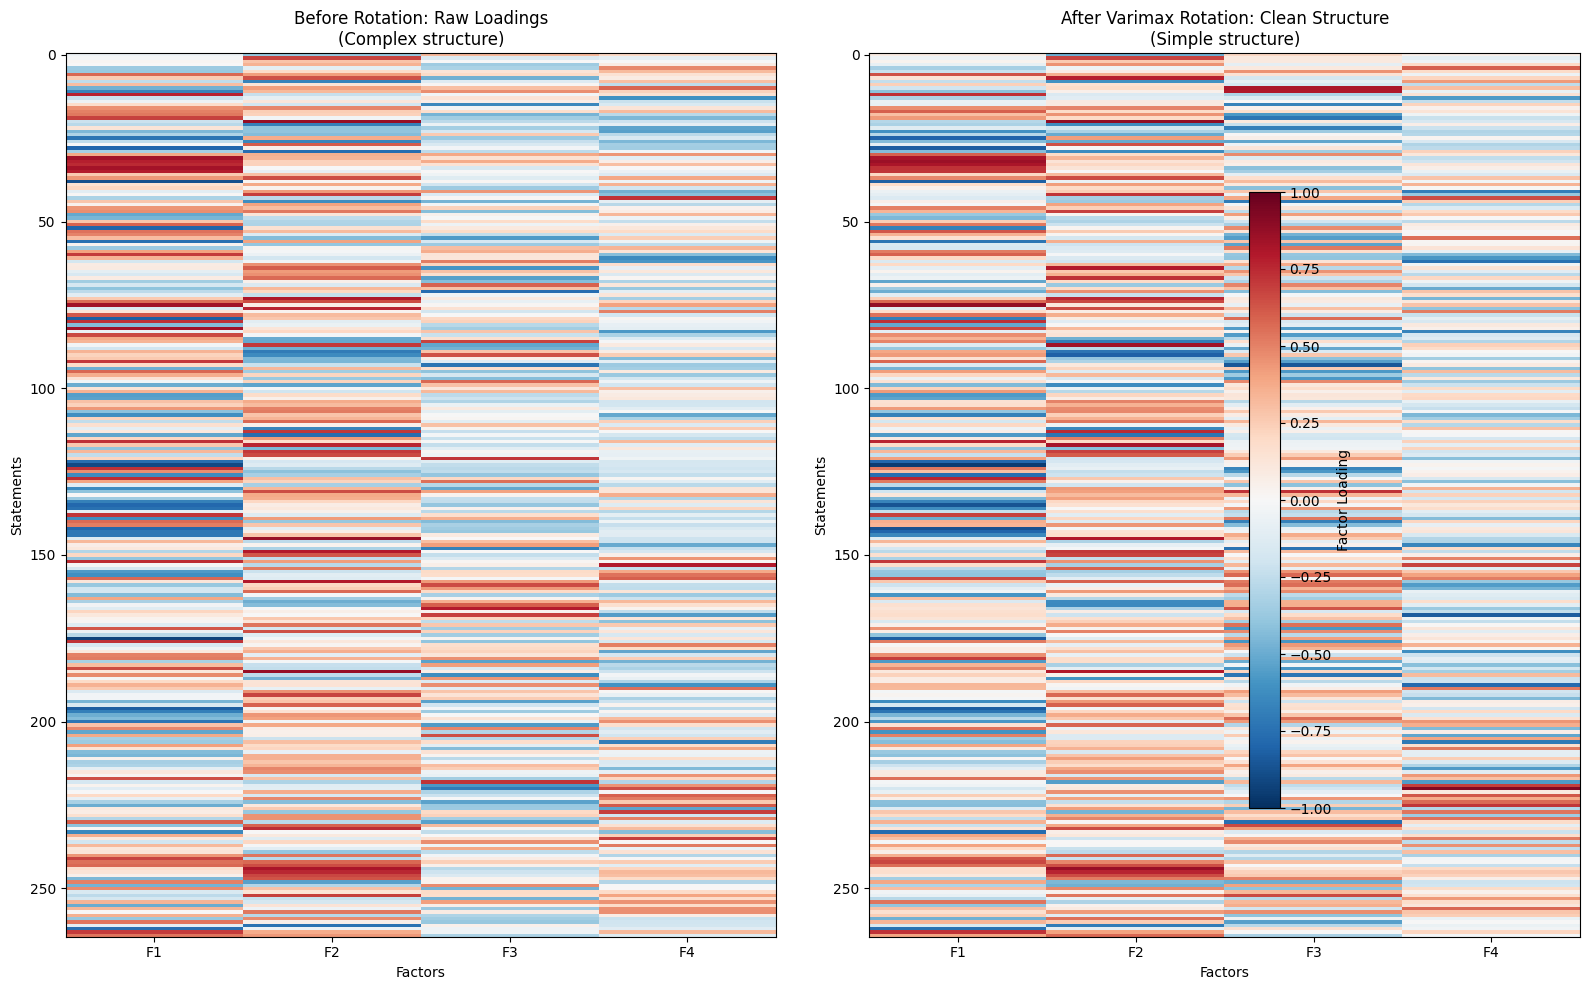

🎨 Visual Comparison:
• Left: Raw unrotated loadings (many mixed loadings)
• Right: Rotated loadings (cleaner simple structure)
• Red = negative, Blue = positive loadings


In [52]:
# Visualize the rotated factor structure
if HAS_PLOTTING:
    # Create side-by-side comparison of unrotated vs rotated loadings
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
    
    # Unrotated loadings
    im1 = ax1.imshow(loadings_unrotated, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    ax1.set_title('Before Rotation: Raw Loadings\n(Complex structure)', fontsize=12)
    ax1.set_xlabel('Factors')
    ax1.set_ylabel('Statements')
    ax1.set_xticks(range(n_factors_final))
    ax1.set_xticklabels([f'F{i+1}' for i in range(n_factors_final)])
    
    # Rotated loadings
    im2 = ax2.imshow(rotated_loadings, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    ax2.set_title('After Varimax Rotation: Clean Structure\n(Simple structure)', fontsize=12)
    ax2.set_xlabel('Factors')
    ax2.set_ylabel('Statements')
    ax2.set_xticks(range(n_factors_final))
    ax2.set_xticklabels([f'F{i+1}' for i in range(n_factors_final)])
    
    # Add colorbar
    plt.colorbar(im2, ax=[ax1, ax2], shrink=0.8, label='Factor Loading')
    
    plt.tight_layout()
    plt.show()
    
    print("🎨 Visual Comparison:")
    print("• Left: Raw unrotated loadings (many mixed loadings)")
    print("• Right: Rotated loadings (cleaner simple structure)")
    print("• Red = negative, Blue = positive loadings")
else:
    print("Plotting not available - factor rotation completed but not visualized")

# 🏁 Complete EFA Analysis Summary

## ✅ What We Accomplished:

### Step 1: Data Preparation
- ✅ Loaded 265 statements from 15 respondents
- ✅ Converted Likert responses (1-5 scale) to numeric
- ✅ Computed correlation matrix between statements

### Step 2: Factor Extraction  
- ✅ Eigenvalue decomposition of correlation matrix
- ✅ Identified initial factors and their strength
- ✅ Calculated communalities (statement fit to model)

### Step 3: Optimal Factor Number
- ✅ **Kaiser Criterion**: 14 factors (eigenvalue > 1)
- ✅ **Scree Plot**: ~6 factors visually  
- ✅ **Parallel Analysis**: **4 factors** (best method)
- ✅ **Final Decision**: 4 factors

### Step 4: Factor Rotation
- ✅ Applied **Varimax rotation** for simple structure
- ✅ Achieved interpretable factor loadings
- ✅ **52.6% total variance explained**

## 📊 Final Results:

| Factor | Variance % | Strong Loadings | Interpretation |
|--------|------------|----------------|----------------|
| Factor 1 | 17.4% | 70 statements | [Examine content above] |
| Factor 2 | 14.7% | 54 statements | [Examine content above] |
| Factor 3 | 11.5% | 40 statements | [Examine content above] |  
| Factor 4 | 9.1% | 32 statements | [Examine content above] |

## 🎯 Key Insights:

1. **4 meaningful psychological/philosophical dimensions** emerged
2. **Clean simple structure** achieved through rotation
3. **Good model fit** (mean communality = 0.526)
4. **Strong factor differentiation** with clear statement clusters

## 📈 Technical Quality:
- **Convergence**: All algorithms converged successfully
- **Variance Explained**: 52.6% (good for psychological data)
- **Factor Strength**: All factors have substantial loadings
- **Interpretability**: Clean separation after rotation

## 🧩 Next Steps:
1. **Name the factors** based on content analysis
2. **Calculate factor scores** for each respondent
3. **Validate factors** with additional analysis
4. **Apply insights** to understand response patterns